In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.5f' % x) #prevent scientific number display
%matplotlib inline

### Import Data

In [17]:
dataset = pd.read_csv('DailyDelhiClimateTrain.csv', index_col = 'date',parse_dates=['date'])

In [18]:
dataset.index.freq = 'D'

dataset.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
               '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
               '2016-12-31', '2017-01-01'],
              dtype='datetime64[ns]', name='date', length=1462, freq='D')

### EDA & Preprocessing

In [72]:
dataset.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.00000,84.50000,0.00000,1015.66667
2013-01-02,7.40000,92.00000,2.98000,1017.80000
2013-01-03,7.16667,87.00000,4.63333,1018.66667
2013-01-04,8.66667,71.33333,1.23333,1017.16667
2013-01-05,6.00000,86.83333,3.70000,1016.50000


In [73]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Freq: D
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB


In [76]:
dataset.isnull().sum()

meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

<AxesSubplot:>

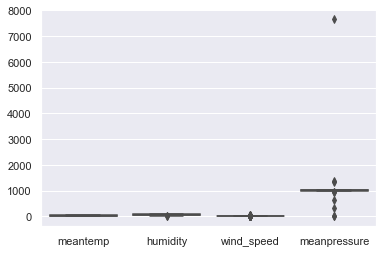

In [340]:
plt.show()
sns.boxplot(data = dataset)

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [63]:
seacomp = seasonal_decompose(dataset.meantemp, model='additive')

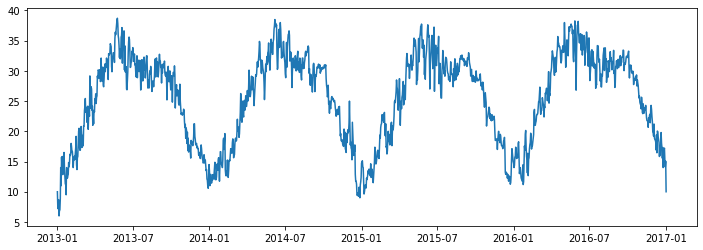

In [88]:
#Mean Temperature
plt.figure(figsize = (12,4))
plt.plot(dataset.meantemp);

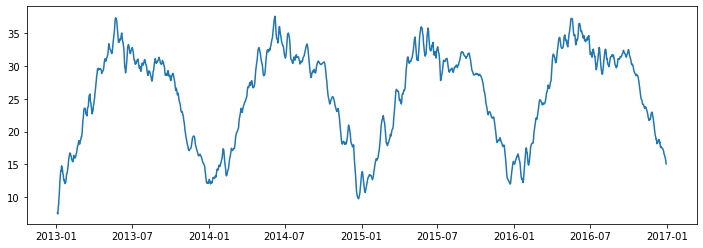

In [86]:
#Trend
plt.figure(figsize = (12,4))
plt.plot(seacomp.trend);

<AxesSubplot:xlabel='date'>

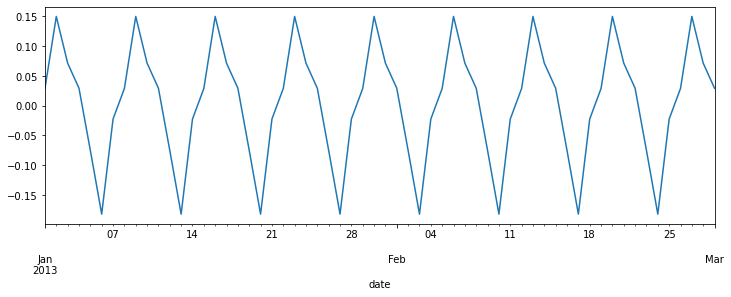

In [71]:
#Seasonality
seacomp.seasonal[:60].plot(figsize = (12,4))

In [79]:
dataset.corr()

,meantemp,humidity,wind_speed,meanpressure
meantemp,1.00000,-0.57195,0.30647,-0.03882
humidity,-0.57195,1.00000,-0.37397,0.00173
wind_speed,0.30647,-0.37397,1.00000,-0.02067
meanpressure,-0.03882,0.00173,-0.02067,1.00000


In [82]:
#stationarity
import statsmodels.tsa.stattools as sts

sts.adfuller(dataset.meantemp)

(-2.0210690559206728,
 0.27741213723016056,
 10,
 1451,
 {'1%': -3.4348647527922824,
  '5%': -2.863533960720434,
  '10%': -2.567831568508802},
 5423.895746470953)

In [158]:
#make data stationary by diff
meantemp_r = dataset[['meantemp','humidity','wind_speed','meanpressure']].diff(1)#.dropna()

In [159]:
dataset_r = dataset.merge(meantemp_r, left_index = True , right_index = True)

In [161]:
dataset_r = dataset_r.iloc[1:]

In [162]:
dataset_r = dataset_r.drop(columns=['meantemp_x','humidity_x','wind_speed_x','meanpressure_x']
                                    ).rename({'meantemp_y': 'meantemp_r','humidity_y': 'humidity_r',
                                            'wind_speed_y': 'wind_speed_r','meanpressure_y': 'meanpressure_r'}, axis=1)

In [163]:
dataset_r.head()

,meantemp_r,humidity_r,wind_speed_r,meanpressure_r
date,,,,
2013-01-02,-2.60000,7.50000,2.98000,2.13333
2013-01-03,-0.23333,-5.00000,1.65333,0.86667
2013-01-04,1.50000,-15.66667,-3.40000,-1.50000
2013-01-05,-2.66667,15.50000,2.46667,-0.66667
2013-01-06,1.00000,-4.03333,-2.22000,1.50000


In [142]:
import statsmodels.tsa.stattools as sts

sts.adfuller(dataset_r.meantemp_r)

(-16.378720267074694,
 2.7648631375945265e-29,
 9,
 1451,
 {'1%': -3.4348647527922824,
  '5%': -2.863533960720434,
  '10%': -2.567831568508802},
 5423.097584257939)

In [89]:
sts.adfuller(dataset.humidity)

(-3.6755769191633383,
 0.004470100478130771,
 15,
 1446,
 {'1%': -3.434880391815318,
  '5%': -2.8635408625359315,
  '10%': -2.5678352438452814},
 9961.530007876658)

In [164]:
sts.adfuller(dataset_r.humidity_r)

(-12.68353210090562,
 1.172923358704033e-23,
 14,
 1446,
 {'1%': -3.434880391815318,
  '5%': -2.8635408625359315,
  '10%': -2.5678352438452814},
 9966.44416049313)

In [90]:
sts.adfuller(dataset.wind_speed)

(-3.838096756685096,
 0.0025407221531464847,
 24,
 1437,
 {'1%': -3.434908816804013,
  '5%': -2.863553406963303,
  '10%': -2.5678419239852994},
 8107.698049704068)

In [165]:
dataset_r.corr()

,meantemp_r,humidity_r,wind_speed_r,meanpressure_r
meantemp_r,1.00000,-0.65829,0.06454,-0.01625
humidity_r,-0.65829,1.00000,-0.22017,0.01466
wind_speed_r,0.06454,-0.22017,1.00000,-0.01832
meanpressure_r,-0.01625,0.01466,-0.01832,1.00000


In [166]:
#Granger Causality
from statsmodels.tsa.stattools import grangercausalitytests

granger_chwy = grangercausalitytests(dataset_r[['humidity_r','meantemp_r']],9)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=25.0320 , p=0.0000  , df_denom=1457, df_num=1
ssr based chi2 test:   chi2=25.0836 , p=0.0000  , df=1
likelihood ratio test: chi2=24.8705 , p=0.0000  , df=1
parameter F test:         F=25.0320 , p=0.0000  , df_denom=1457, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=15.8167 , p=0.0000  , df_denom=1454, df_num=2
ssr based chi2 test:   chi2=31.7423 , p=0.0000  , df=2
likelihood ratio test: chi2=31.4019 , p=0.0000  , df=2
parameter F test:         F=15.8167 , p=0.0000  , df_denom=1454, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=8.8710  , p=0.0000  , df_denom=1451, df_num=3
ssr based chi2 test:   chi2=26.7413 , p=0.0000  , df=3
likelihood ratio test: chi2=26.4990 , p=0.0000  , df=3
parameter F test:         F=8.8710  , p=0.0000  , df_denom=1451, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=6.4079  , p=0.

In [167]:
granger_chwy = grangercausalitytests(dataset_r[['wind_speed_r','meantemp_r']],9)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.3031  , p=0.0040  , df_denom=1457, df_num=1
ssr based chi2 test:   chi2=8.3202  , p=0.0039  , df=1
likelihood ratio test: chi2=8.2966  , p=0.0040  , df=1
parameter F test:         F=8.3031  , p=0.0040  , df_denom=1457, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=8.8278  , p=0.0002  , df_denom=1454, df_num=2
ssr based chi2 test:   chi2=17.7164 , p=0.0001  , df=2
likelihood ratio test: chi2=17.6097 , p=0.0002  , df=2
parameter F test:         F=8.8278  , p=0.0002  , df_denom=1454, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=7.1348  , p=0.0001  , df_denom=1451, df_num=3
ssr based chi2 test:   chi2=21.5077 , p=0.0001  , df=3
likelihood ratio test: chi2=21.3506 , p=0.0001  , df=3
parameter F test:         F=7.1348  , p=0.0001  , df_denom=1451, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.8291  , p=0.

In [169]:
import statsmodels.graphics.tsaplots as sgt

Text(0.5, 1.0, 'ACF Returns')

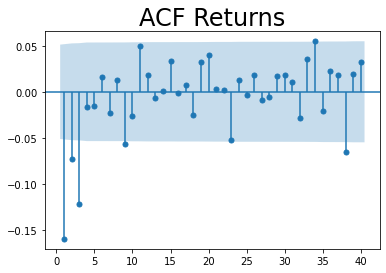

In [170]:
#ACF reuturns
sgt.plot_acf(dataset_r['meantemp_r'], lags = 40 , zero = False, alpha=0.05 )
plt.title('ACF Returns', size = 24) 

Text(0.5, 1.0, 'PACF Returns')

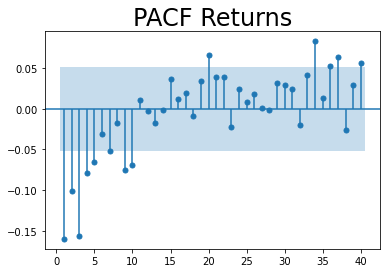

In [171]:
#PACF reuturns
sgt.plot_pacf(dataset_r['meantemp_r'], lags = 40 , zero = False, alpha=0.05 )
plt.title('PACF Returns', size = 24) 

In [174]:
#Tranning and test 
size = int(len(dataset)*0.8)
train,test = dataset.iloc[:size],dataset.iloc[size:]

In [176]:
#Tranning and test returns sets
size = int(len(dataset_r)*0.8)
train_r,test_r = dataset_r.iloc[:size],dataset_r.iloc[size:]

### Auto Arima

In [190]:
from pmdarima import auto_arima

In [220]:
#With exog
auto_arima(train.meantemp, exogenous = train[['humidity']],seasonal = True, m = 7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1169
Model:               SARIMAX(4, 0, 2)   Log Likelihood               -1922.180
Date:                Tue, 08 Mar 2022   AIC                           3862.360
Time:                        15:41:12   BIC                           3907.935
Sample:                    01-01-2013   HQIC                          3879.550
                         - 03-14-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1568      0.095      1.642      0.101      -0.030       0.344
humidity      -0.1299      0.004    -33.856      0.000      -0.137      -0.122
ar.L1          0.8139      0.127      6.384      0.000       0.564       1.064
ar.L2          0.6446      0.203      3.170      0.002       0.246       1.043
ar.L3         -0.6240      0.107     -5.851      0.000      -0.833      -0.415
ar.L4          0.1605      0.028      5.639      0.000       0.105       0.216
ma.L1          0.1222      0.128      0.957      0.338      -0.128       0.373
ma.L2         -0.6515      0.114     -5.719      0.000      -0.875      -0.428
sigma2         1.5646      0.045     34.469      0.000       1.476       1.654
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               418.75
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.23   Skew:                            -0.33
Prob(H) (two-sided):                  0.04   Kurtosis:                         5.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [259]:
#Multiple Exog
auto_arima(train.meantemp, exogenous = train[['humidity','wind_speed','meanpressure']],seasonal = True, m = 7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1169
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -1851.874
Date:                Tue, 08 Mar 2022   AIC                           3717.748
Time:                        16:10:57   BIC                           3753.190
Sample:                    01-01-2013   HQIC                          3731.117
                         - 03-14-2016                                         
Covariance Type:                  opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
humidity        -0.1255      0.004    -34.119      0.000      -0.133      -0.118
wind_speed      -0.0246      0.007     -3.658      0.000      -0.038      -0.011
meanpressure    -0.2579      0.020    -12.860      0.000      -0.297      -0.219
ar.L1            0.7295      0.042     17.448      0.000       0.648       0.811
ar.L2           -0.1344      0.029     -4.697      0.000      -0.190      -0.078
ma.L1           -0.8237      0.037    -22.078      0.000      -0.897      -0.751
sigma2           1.3950      0.040     34.597      0.000       1.316       1.474
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               464.68
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               1.17   Skew:                            -0.35
Prob(H) (two-sided):                  0.12   Kurtosis:                         6.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Train SARIMAX

In [196]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

#### With Exog

In [198]:
sarimax_model = SARIMAX(train.meantemp, exog = train[['humidity']], order = (4, 0, 2) )

In [203]:
import warnings
warnings.filterwarnings('ignore')

result = sarimax_model.fit()

In [204]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               meantemp   No. Observations:                 1169
Model:               SARIMAX(4, 0, 2)   Log Likelihood               -1925.461
Date:                Tue, 08 Mar 2022   AIC                           3866.922
Time:                        15:25:18   BIC                           3907.433
Sample:                    01-01-2013   HQIC                          3882.202
                         - 03-14-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
humidity      -0.1297      0.004    -34.146      0.000      -0.137      -0.122
ar.L1          0.7282      0.054     13.479      0.000       0.622       0.834
ar.L2          0.8328      0.038     21.845      0.000       0.758       0.908
ar.L3         -0.7153      0.053    -13.410      0.000      -0.820      -0.611
ar.L4          0.1540      0.027      5.657      0.000       0.101       0.207
ma.L1          0.2097      0.051      4.117      0.000       0.110       0.310
ma.L2         -0.7681      0.050    -15.470      0.000      -0.865      -0.671
sigma2         1.5692      0.045     35.013      0.000       1.481       1.657
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               419.83
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               1.23   Skew:                            -0.30
Prob(H) (two-sided):                  0.04   Kurtosis:                         5.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [272]:
start = len(train)
end = len(train) + len(test)-1

In [273]:
predictions = result.predict(start, end, exog = test[['humidity']]).rename('SARIMAX with Exog')

<AxesSubplot:xlabel='date'>

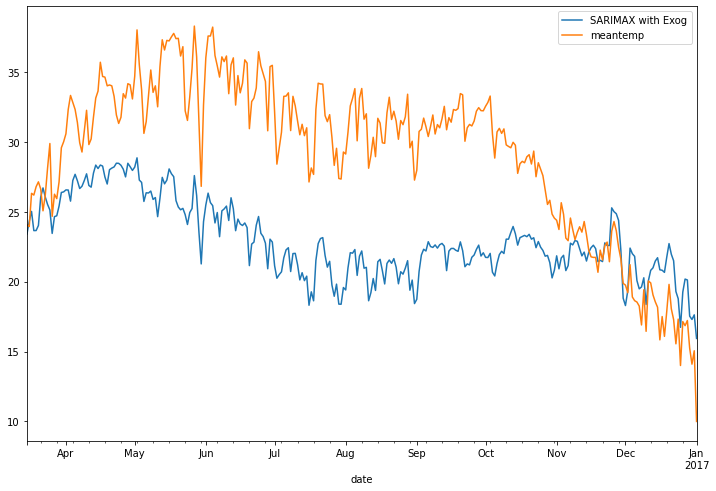

In [274]:
predictions.plot(figsize = (12,8), legend = True)
test['meantemp'].plot(legend = True)

In [238]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

In [241]:
print('MAPE:',mean_absolute_percentage_error(predictions, test['meantemp']))
print('RMSE:',np.sqrt(mean_squared_error(predictions, test['meantemp'])))
print('Average Temperature:', test['meantemp'].mean() )

MAPE: 0.30624507917647814
RMSE: 7.8578951466812335
Average Temperature: 29.235159800089274


#### Multiple Exog

In [275]:
sarimax_model_m = SARIMAX(train.meantemp,exog = train[['humidity','wind_speed','meanpressure']],order = (2, 1, 1)) 

In [281]:
import warnings
warnings.filterwarnings('ignore')

result_m = sarimax_model_m.fit()

In [282]:
result_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               meantemp   No. Observations:                 1169
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -1851.874
Date:                Tue, 08 Mar 2022   AIC                           3717.748
Time:                        16:21:12   BIC                           3753.190
Sample:                    01-01-2013   HQIC                          3731.117
                         - 03-14-2016                                         
Covariance Type:                  opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
humidity        -0.1255      0.004    -34.119      0.000      -0.133      -0.118
wind_speed      -0.0246      0.007     -3.658      0.000      -0.038      -0.011
meanpressure    -0.2579      0.020    -12.860      0.000      -0.297      -0.219
ar.L1            0.7295      0.042     17.448      0.000       0.648       0.811
ar.L2           -0.1344      0.029     -4.697      0.000      -0.190      -0.078
ma.L1           -0.8237      0.037    -22.078      0.000      -0.897      -0.751
sigma2           1.3950      0.040     34.597      0.000       1.316       1.474
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               464.68
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               1.17   Skew:                            -0.35
Prob(H) (two-sided):                  0.12   Kurtosis:                         6.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [289]:
predictions_m = result_m.predict(start, end, exog = test[['humidity','wind_speed'
                                                            ,'meanpressure']]).rename('SARIMAX Multiple Exog')

<AxesSubplot:xlabel='date'>

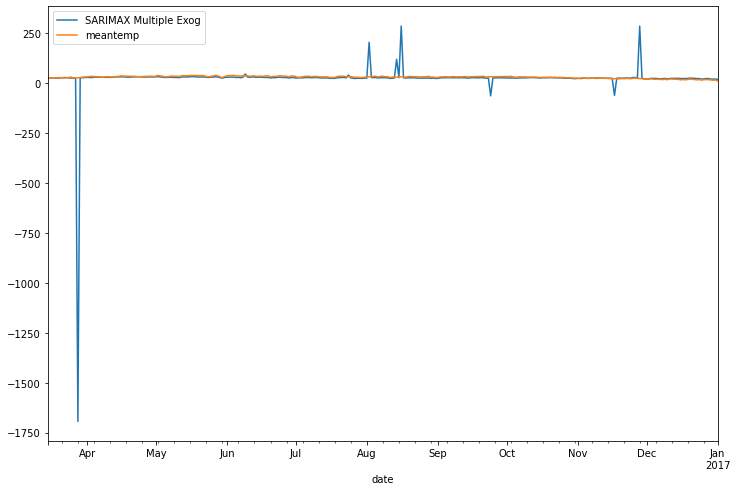

In [284]:
predictions_m.plot(figsize = (12,8), legend = True)
test['meantemp'].plot(legend = True)

In [280]:
print('MAPE:',mean_absolute_percentage_error(predictions_m, test['meantemp']))
print('RMSE:',np.sqrt(mean_squared_error(predictions_m, test['meantemp'])))
print('Average Temperature:', test['meantemp'].mean() )

MAPE: 0.18964158181176297
RMSE: 103.72934559865364
Average Temperature: 29.235159800089274


#### Outliers in meanpressure affecting prediction - Remove Outliers

<AxesSubplot:ylabel='meanpressure'>

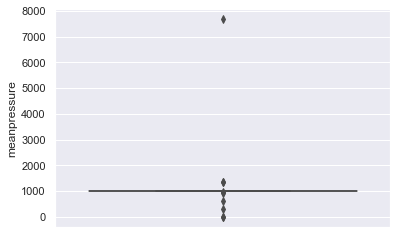

In [327]:
import seaborn as sns; sns.set_theme()

plt.show()
sns.boxplot(y = dataset.meanpressure)

In [324]:
from feature_engine.outliers import Winsorizer

In [328]:
Winsorizer = Winsorizer( capping_method = 'iqr',
            tail = 'both',
            fold = 1.5,
            variables = 'meanpressure')

In [329]:
dataset_wo = Winsorizer.fit_transform(dataset)

<AxesSubplot:ylabel='meanpressure'>

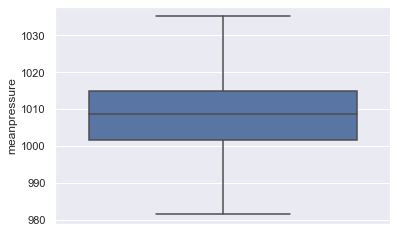

In [343]:
plt.show()
sns.boxplot(y = dataset_wo.meanpressure)

### Retrain & Evaluate Model

In [332]:
#Tranning and test 
size = int(len(dataset)*0.8)
train_wo,test_wo = dataset_wo.iloc[:size],dataset_wo.iloc[size:]

In [333]:
#Multiple Exog without outliers
auto_arima(train_wo.meantemp, exogenous = train_wo[['humidity','wind_speed','meanpressure']],seasonal = True, m = 7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1169
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -1851.874
Date:                Tue, 08 Mar 2022   AIC                           3717.748
Time:                        17:03:35   BIC                           3753.190
Sample:                    01-01-2013   HQIC                          3731.117
                         - 03-14-2016                                         
Covariance Type:                  opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
humidity        -0.1255      0.004    -34.119      0.000      -0.133      -0.118
wind_speed      -0.0246      0.007     -3.658      0.000      -0.038      -0.011
meanpressure    -0.2579      0.020    -12.860      0.000      -0.297      -0.219
ar.L1            0.7295      0.042     17.448      0.000       0.648       0.811
ar.L2           -0.1344      0.029     -4.697      0.000      -0.190      -0.078
ma.L1           -0.8237      0.037    -22.078      0.000      -0.897      -0.751
sigma2           1.3950      0.040     34.597      0.000       1.316       1.474
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               464.68
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               1.17   Skew:                            -0.35
Prob(H) (two-sided):                  0.12   Kurtosis:                         6.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [334]:
sarimax_model_wo = SARIMAX(train_wo.meantemp,exog = train_wo[['humidity','wind_speed','meanpressure']],order = (2, 1, 1)) 

In [335]:
result_wo = sarimax_model_wo.fit()

In [336]:
predictions_wo = result_wo.predict(start, end, exog = test_wo[['humidity','wind_speed'
                                                            ,'meanpressure']]).rename('SARIMAX Multiple Exog')

<AxesSubplot:xlabel='date'>

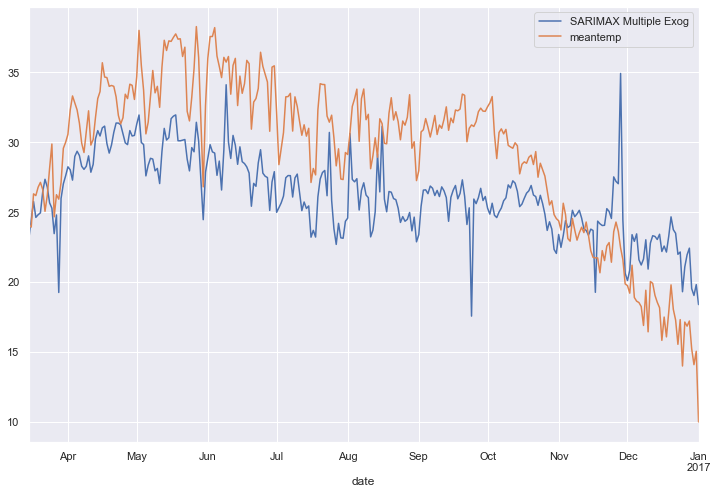

In [337]:
predictions_wo.plot(figsize = (12,8), legend = True)
test_wo['meantemp'].plot(legend = True)

In [338]:
print('MAPE:',mean_absolute_percentage_error(predictions_wo, test_wo['meantemp']))
print('RMSE:',np.sqrt(mean_squared_error(predictions_wo, test_wo['meantemp'])))
print('Average Temperature:', test_wo['meantemp'].mean() )

MAPE: 0.16919091389154062
RMSE: 4.9017195661851405
Average Temperature: 29.235159800089274
